# Exercise 8

In [1]:
# import the packages we are going to be using
import numpy as np # for getting our distribution
import pandas as pd # to handle data frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy import stats # to compute statistics

1. Run a simple linear regression relating the species richness with each one of the continuous
environmental variables in the dataset: Altitude, Actual_river_slope, Elevation_mean_catch,
prec_ann_catch, temp_ann, temp_jan, temp_jul. Before running the analyses, check if any of the
variables requires to be transformed and apply the appropriate transformation. Compute the
regression coefficient estimates, the r-square and the F-statistics. You may plot the fitted model.

In [2]:
# Read in data
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Add species richness column (ex7)
# ID the first species column
species_start = df.columns.get_loc('Abramis brama')

# Get everything from species start to the end of the df
species_df = df.iloc[:, species_start:]

# Convert absence and presence to 0/1
species_binary = (species_df > 0).astype(int)

# Sum across each row to get species richness
df['species_richness'] = species_binary.sum(axis=1)

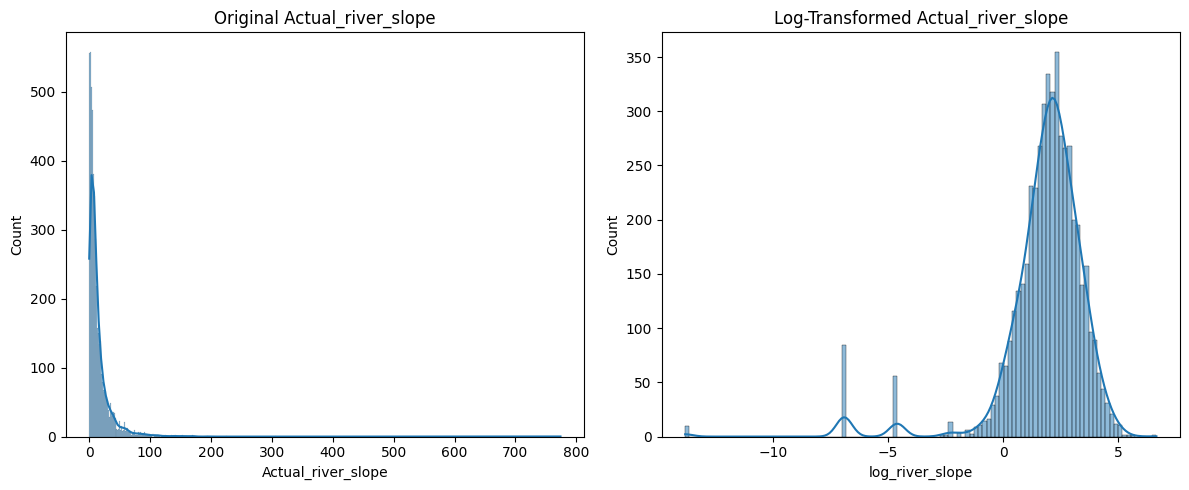

In [14]:
# Add a small constant to avoid log(0)
df["log_river_slope"] = np.log(df["Actual_river_slope"] + 1e-6)

# Create subplots for original and log-transformed distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
sns.histplot(df["Actual_river_slope"], ax=axs[0], kde=True)
axs[0].set_title("Original Actual_river_slope")

# Log-transformed distribution
sns.histplot(df["log_river_slope"], ax=axs[1], kde=True)
axs[1].set_title("Log-Transformed Actual_river_slope")

plt.tight_layout()
plt.show()

Altitude: slope=-0.00, r²=0.103, p=0.000000
- reject H0 that the slope of the relationship is = 0
log_river_slope: slope=-0.42, r²=0.078, p=0.000000
- reject H0 that the slope of the relationship is = 0
Elevation_mean_catch: slope=-0.00, r²=0.055, p=0.000000
- reject H0 that the slope of the relationship is = 0
prec_ann_catch: slope=-0.00, r²=0.023, p=0.000000
- reject H0 that the slope of the relationship is = 0
temp_ann: slope=0.41, r²=0.095, p=0.000000
- reject H0 that the slope of the relationship is = 0
temp_jan: slope=0.22, r²=0.042, p=0.000000
- reject H0 that the slope of the relationship is = 0
temp_jul: slope=0.34, r²=0.093, p=0.000000
- reject H0 that the slope of the relationship is = 0


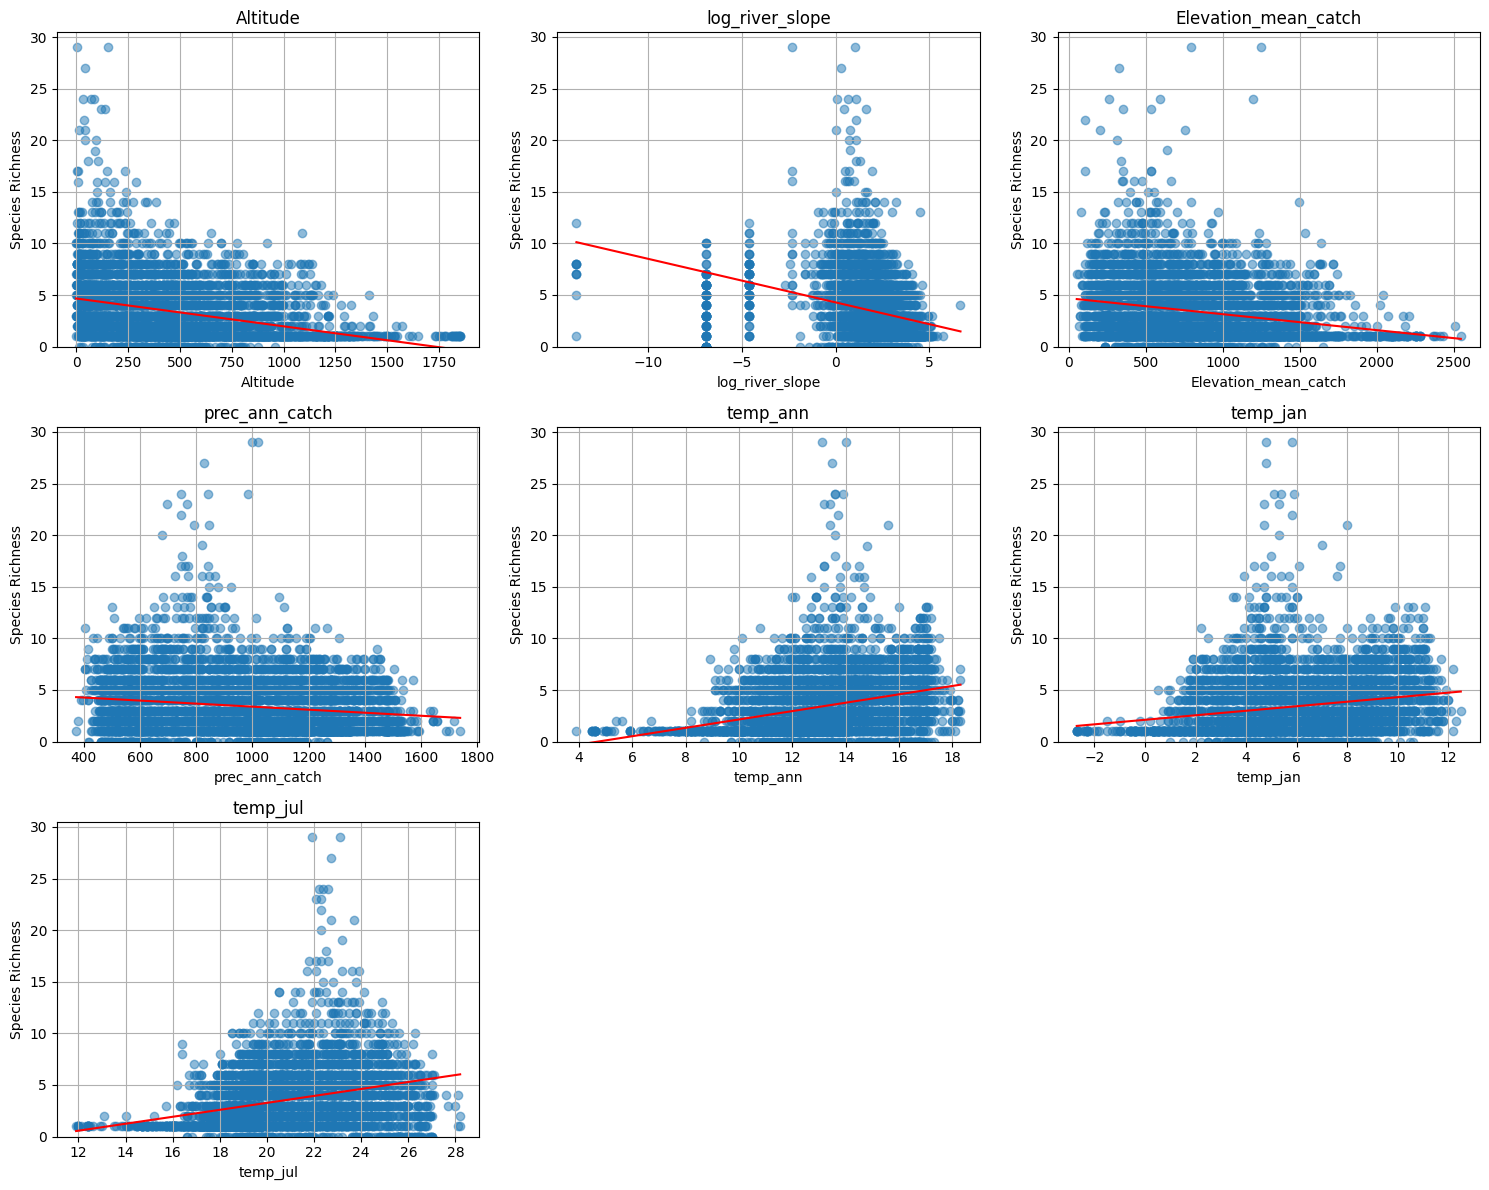

In [16]:
# List of x-variable column names to loop through
x_vars = ['Altitude', 'log_river_slope', 'Elevation_mean_catch', 
          'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
y = df["species_richness"]

# Define number of subplots
n_vars = len(x_vars)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # Flatten in case of single row

alpha = 0.05

for i, x_var in enumerate(x_vars):
    ax = axes[i]
    x = df[x_var]
    y_clean = y

    # Drop rows with missing values in x or y
    mask = x.notna() & y_clean.notna()
    x_clean = x[mask]
    y_clean = y_clean[mask]

    # Linear regression
    slope, intercept, r, p, std_err = stats.linregress(x_clean, y_clean)

    # Print regression results
    print(f'{x_var}: slope={slope:.2f}, r²={r**2:.3f}, p={p:.6f}')
    if p <= alpha:
        print('- reject H0 that the slope of the relationship is = 0')
    else:
        print('- fail to reject H0 that the slope of the relationship is = 0')

    # Prepare regression line
    x_sorted = np.linspace(x_clean.min(), x_clean.max(), 100)
    y_pred = intercept + slope * x_sorted

    # Plot scatter and regression line
    ax.scatter(x_clean, y_clean, alpha=0.5)
    ax.plot(x_sorted, y_pred, color="red")
    ax.set_title(f"{x_var}")
    ax.set_xlabel(x_var)
    ax.set_ylabel("Species Richness")
    ax.grid(True)
    ax.set_ylim(bottom=0)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()